In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from DynamicLoop import DynamicLoop

In [2]:
import glob
import os
from file_sort_method import *

In [5]:
g345files = glob.glob('dl_G345/datas/0.1hz/*.csv')
g345files.sort(key=force_of_file)
g375files = glob.glob('dl_G375/datas/0.1hz/*.csv')
g375files.sort(key=force_of_file)
g375_1_files = glob.glob('dl_G375_1/datas/0.1hz/*.csv')
g375_1_files.sort(key=force_of_file)
g345files, g375files, g375_1_files

(['dl_G345/datas/0.1hz\\dl_G345_0.7kn2017-8-16(11-3-45).csv',
  'dl_G345/datas/0.1hz\\dl_G345_1.4kn2017-8-16(10-46-19).csv',
  'dl_G345/datas/0.1hz\\dl_G345_2.1kn2017-8-16(11-5-46).csv',
  'dl_G345/datas/0.1hz\\dl_G345_2.8kn2017-8-16(10-48-36).csv',
  'dl_G345/datas/0.1hz\\dl_G345_3.5kn2017-8-16(10-50-42).csv',
  'dl_G345/datas/0.1hz\\dl_G345_4.2kn2017-8-16(10-52-50).csv',
  'dl_G345/datas/0.1hz\\dl_G345_4.9kn2017-8-16(10-54-59).csv',
  'dl_G345/datas/0.1hz\\dl_G345_5.6kn2017-8-16(10-57-9).csv',
  'dl_G345/datas/0.1hz\\dl_G345_6.3kn2017-8-16(10-59-8).csv',
  'dl_G345/datas/0.1hz\\dl_G345_7kn2017-8-16(11-1-9).csv',
  'dl_G345/datas/0.1hz\\dl_G345_7.7kn2017-8-16(11-8-11).csv',
  'dl_G345/datas/0.1hz\\dl_G345_8.4kn2017-8-16(11-10-24).csv'],
 ['dl_G375/datas/0.1hz\\dl_G375_0.7kn2017-8-17(16-14-34).csv',
  'dl_G375/datas/0.1hz\\dl_G375_1.4kn2017-8-17(16-16-7).csv',
  'dl_G375/datas/0.1hz\\dl_G375_2.1kn2017-8-17(16-17-26).csv',
  'dl_G375/datas/0.1hz\\dl_G375_2.8kn2017-8-17(16-18-46).csv',
 

In [38]:
def mdr_gen(files):
    data_dict = {}
    plt.figure(figsize=(16,20),dpi=300)
    for p in range(1,6):
        sigma_m = [0]
        epsilon_m = [0]
        sigma_m_byfit = [0]
        epsilon_m_byfit = [0]
        modulus = [0]
        damping_ratio = [0]
        modulus_byfit = [0]
        damping_ratio_byfit = [0]
        for f in files:
            df = pd.read_csv(f, encoding='gb2312')
            loop = DynamicLoop(df['epsilon_d'][p*50:p*50+50], df['sigma_d'][p*50:p*50+50])
            epsilon_m.append(loop.epsilon_m())
            sigma_m.append(loop.sigma_m())
            epsilon_m_byfit.append(loop.epsilon_m_byfit())
            sigma_m_byfit.append(loop.sigma_m_byfit())
            modulus.append(loop.modulus())
            damping_ratio.append(loop.damping_ratio())
            modulus_byfit.append(loop.modulus_byfit())
            damping_ratio_byfit.append(loop.damping_ratio_byfit())

            plt.subplot(6,2,p*2-1)
            loop.plot_to_center(plot_fit=False)
            plt.subplot(6,2,p*2)
            loop.plot_to_center(plot_loop=False)
            #plt.axis([-0.0008, 0.0008, -150, 150])

        tmp_dict = {(p+1, 'epsilon_m'):epsilon_m,
                   (p+1, 'sigma_m'):sigma_m,
                   (p+1, 'modulus'):modulus,
                   (p+1, 'damping_ratio'):damping_ratio,
                   (p+1, 'epsilon_m_byfit'):epsilon_m_byfit,
                   (p+1, 'sigma_m_byfit'):sigma_m_byfit,
                   (p+1, 'modulus_byfit'):modulus_byfit,
                   (p+1, 'damping_ratio_byfit'):damping_ratio_byfit}
        data_dict.update(tmp_dict)

        xm = max(epsilon_m)
        ym = max(sigma_m)
        xylim = [-xm*1.25, xm*1.25, -ym*1.2, ym*1.2]
        plt.subplot(6,2,p*2-1)
        plt.plot(epsilon_m, sigma_m, 'go-')
        plt.axis(xylim)
        plt.text(-xm, ym, 'period {0}'.format(p+1))
        plt.subplot(6,2,p*2)
        plt.plot(epsilon_m_byfit, sigma_m_byfit, 'go-')
        plt.axis(xylim)
        plt.text(-xm, ym, 'period {0}'.format(p+1))

    modulus_and_damping_ratio = pd.DataFrame(data_dict)
    filedir = os.path.dirname(f)
    topath = os.path.dirname(filedir)
    modulus_and_damping_ratio.to_csv(os.path.join(topath,'modulus_and_damping_ratio.csv'), index=False)

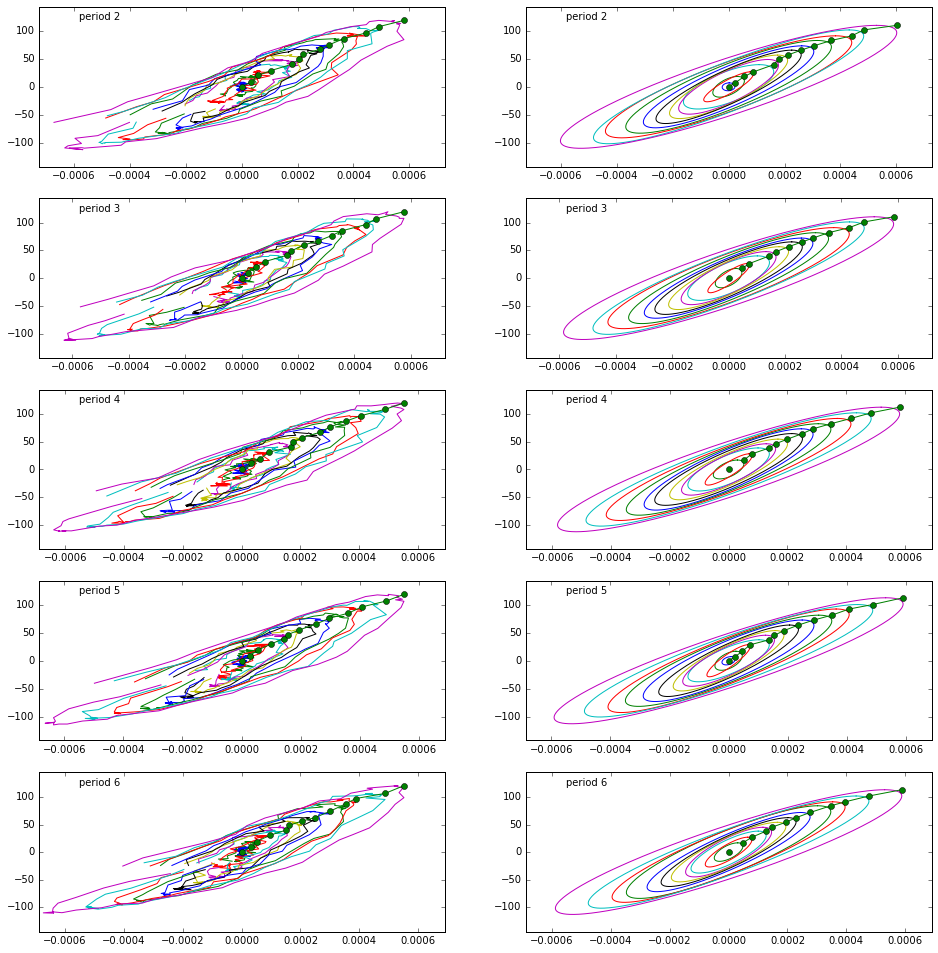

In [39]:
mdr_gen(g345files)

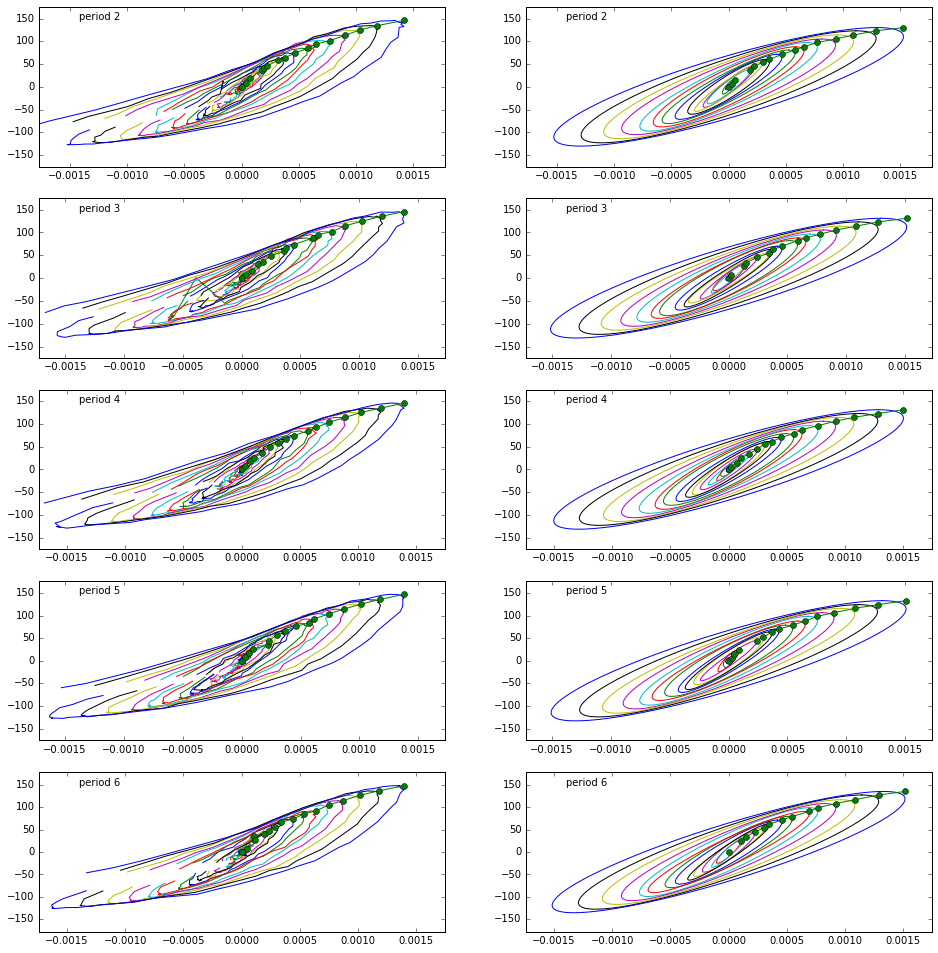

In [40]:
mdr_gen(g375files)

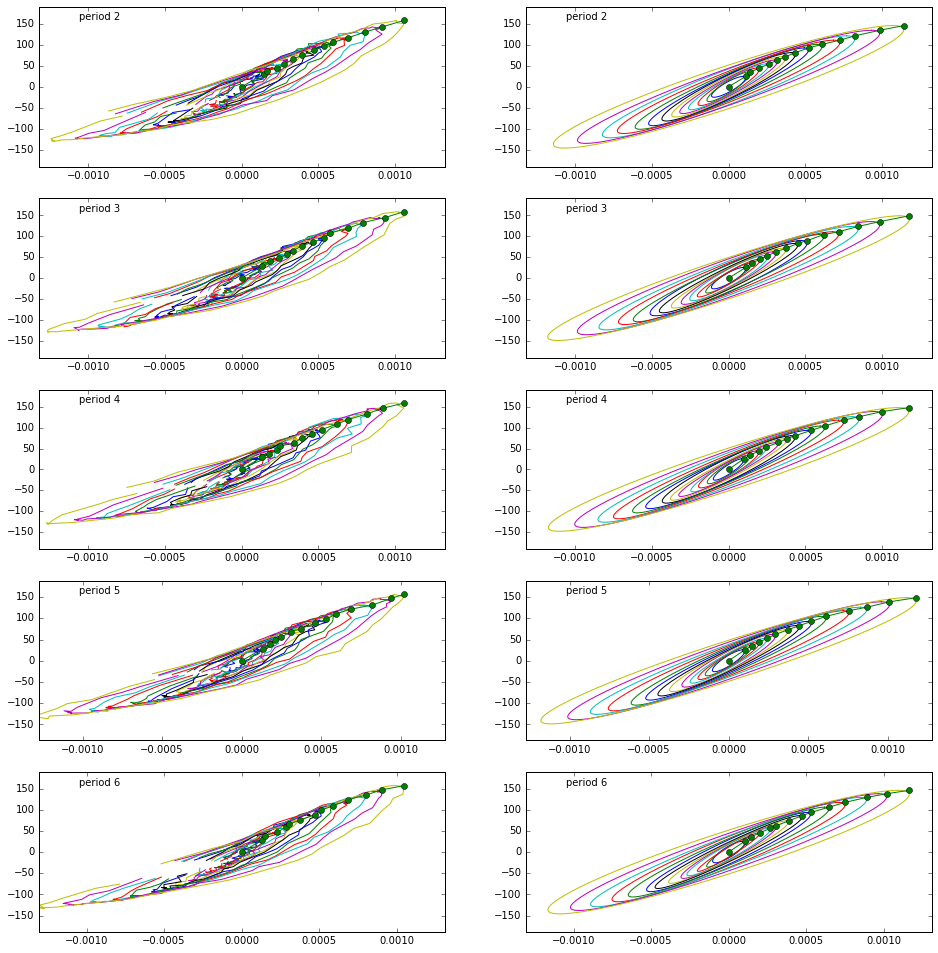

In [41]:
mdr_gen(g375_1_files)

In [57]:
df = pd.read_csv('dl_G375/datas/modulus_and_damping_ratio.csv', encoding='gb2312',header=[0,1], tupleize_cols=True)
df.columns = pd.MultiIndex.from_tuples(df.columns)
df

2                                                               \
   damping_ratio damping_ratio_byfit epsilon_m epsilon_m_byfit        modulus   
0       0.000000            0.000000  0.000000        0.000000       0.000000   
1       0.034475            0.378187  0.000040        0.000027  204624.303072   
2       0.141013            0.274106  0.000075        0.000055  251294.336648   
3       0.051197                 NaN  0.000178             NaN  213428.464687   
4       0.148422            0.189178  0.000194        0.000188  214682.849534   
5       0.163536            0.181156  0.000223        0.000223  203056.322066   
6       0.135373            0.155987  0.000316        0.000298  185716.919549   
7       0.174655            0.223725  0.000383        0.000357  167892.940516   
8       0.188409            0.212186  0.000468        0.000468  159364.409391   
9       0.186551            0.209871  0.000584        0.000581  145339.799344   
10      0.207725            0.231952  0.000649        0.000658  144401.317499   
11      0.217935            0.230553  0.000773        0.000776  131472.895394   
12      0.213302            0.246177  0.000903        0.000935  125334.306333   
13      0.213368            0.248138  0.001034        0.001092  120795.844355   
14      0.215367            0.253568  0.001186        0.001289  113392.879289   
15      0.214603            0.265579  0.001419        0.001528  102861.670583   

                                                        3                      \
    modulus_byfit     sigma_m sigma_m_byfit damping_ratio damping_ratio_byfit   
0        0.000000    0.000000      0.000000      0.000000            0.000000   
1   239175.593829    8.213813      6.498063      0.164676            0.468699   
2   288306.190686   18.784406     15.887814     -0.038182                 NaN   
3             NaN   37.913317           NaN      0.177103            0.227487   
4   197717.330236   41.627370     37.245698      0.076137            0.147711   
5   201099.677872   45.362325     44.933427      0.122302            0.148647   
6   180922.504452   58.623052     53.959365      0.125656            0.171201   
7   168540.658020   64.372435     60.209278      0.164711            0.174995   
8   152802.145063   74.575158     71.450541      0.191620            0.206123   
9   139112.166110   84.897600     80.813395      0.137286            0.228751   
10  133645.409145   93.706898     88.000234      0.199800            0.221158   
11  125601.406763  101.652323     97.414869      0.212982            0.232222   
12  112394.922699  113.228373    105.046288      0.212618            0.236690   
13  104402.131163  124.852006    113.956516      0.206900            0.243527   
14   95420.996446  134.529409    123.008337      0.218730            0.250139   
15   85189.250694  145.916701    130.164981      0.220981            0.260530   

        ...                5                           6                      \
        ...          sigma_m sigma_m_byfit damping_ratio damping_ratio_byfit   
0       ...         0.000000      0.000000      0.000000            0.000000   
1       ...         7.411622      6.436013      0.286385                 NaN   
2       ...        16.192647     14.946100     -0.076526                 NaN   
3       ...        26.001242     24.039303      0.161125            0.211501   
4       ...        34.995981           NaN      0.086994            0.160339   
5       ...        44.348728     44.204618      0.167493            0.196012   
6       ...        57.371393     52.752766      0.161847            0.170743   
7       ...        65.377468     63.644329      0.117156            0.143344   
8       ...        75.919511     70.000173      0.190273            0.197488   
9       ...        83.595409     78.756007      0.185289            0.205830   
10      ...        92.212152     87.817527      0.172980            0.181374   
11      ...       104.239431     98.207703      0.192722 

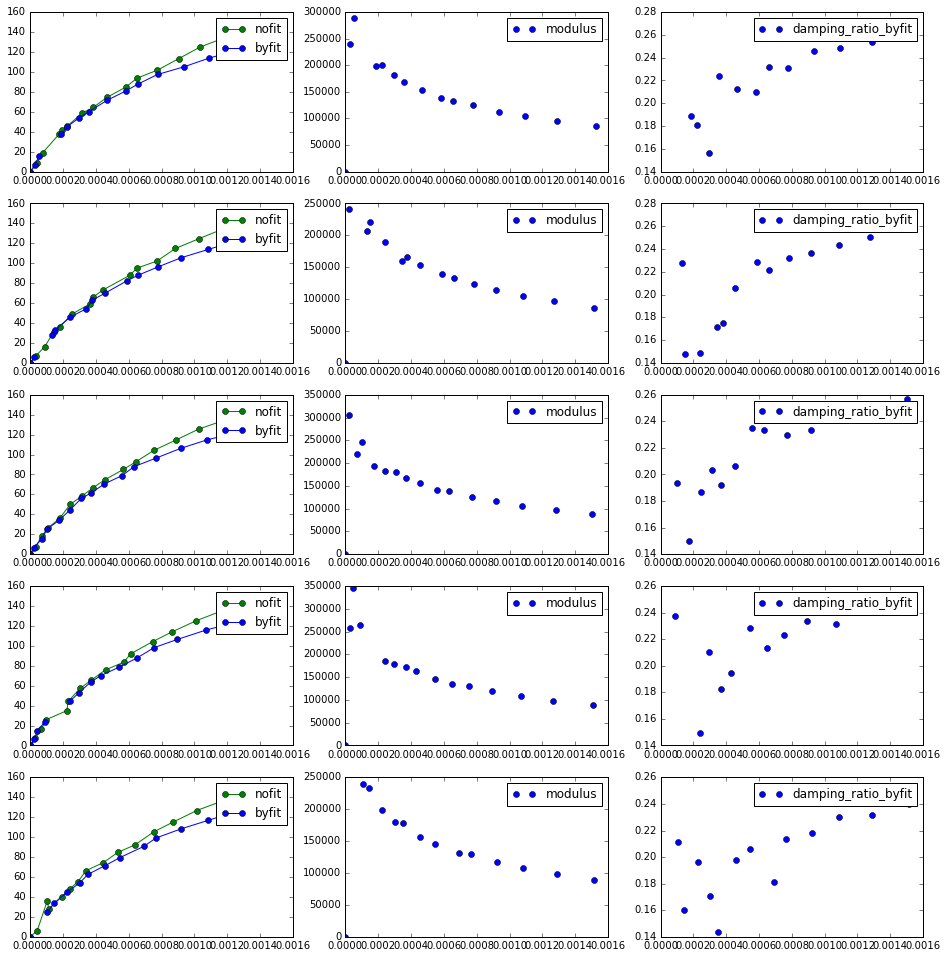

In [62]:
plt.figure(figsize=(16,20),dpi=300)
for i, col in enumerate('23456'):
    data = df[col]
    
    plt.subplot(6,3,3*i+1)
    plt.plot(data['epsilon_m'],data['sigma_m'],'go-',label='nofit')
    plt.plot(data['epsilon_m_byfit'],data['sigma_m_byfit'],'bo-',label='byfit')
    plt.legend()
    
    plt.subplot(6,3,3*i+2)
    plt.plot(data['epsilon_m_byfit'], data['modulus_byfit'],'o',label='modulus')
    plt.legend()
    plt.subplot(6,3,3*i+3)
    plt.plot(data['epsilon_m_byfit'][3:], data['damping_ratio_byfit'][3:],'o',label='damping_ratio_byfit')
    plt.legend()